#  MNIST Dataset

In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

## 1. Loading the MNIST Dataset

The dataset is a collection of images of hand-written digits (0-9).

- Number of Training Data Points = 60K
- Number of Testing Data Points = 10K
- Images Resolution = 28 x 28

In [2]:
mnist_dataset = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist_dataset.load_data()

# Scale the pixels from (0, 255) to (0, 1)
x_train_norm = tf.keras.utils.normalize(x_train, axis=1)
x_test_norm = tf.keras.utils.normalize(x_test, axis=1)

### Displaying a Sample Image

Training Data Points: (60000, 28, 28)
Testing Data Points: (10000, 28, 28)


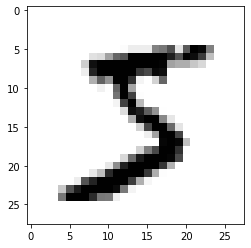

In [3]:
print(f"Training Data Points: {x_train.shape}")
print(f"Testing Data Points: {x_test.shape}")

plt.imshow(x_train[0], cmap="binary")
plt.show()

## 2. Creating the Model

In [5]:
model = Sequential()

# Input Layer
model.add(Flatten())

# Hidden Layers
model.add(Dense(units=128, activation="relu"))
model.add(Dense(units=128, activation="relu"))

# Output Layer
model.add(Dense(units=10, activation="softmax"))

# Compiling the Model
model.compile(optimizer="Adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

## 3. Fitting the Model

In [6]:
fitting_history = model.fit(x_train_norm, y_train, validation_data=(x_test_norm, y_test), batch_size=1000, epochs=10, verbose=2)
print(fitting_history.history.keys())

Epoch 1/10
60/60 - 1s - loss: 0.9453 - accuracy: 0.7826 - val_loss: 0.3525 - val_accuracy: 0.9019
Epoch 2/10
60/60 - 1s - loss: 0.3098 - accuracy: 0.9110 - val_loss: 0.2655 - val_accuracy: 0.9235
Epoch 3/10
60/60 - 1s - loss: 0.2449 - accuracy: 0.9291 - val_loss: 0.2239 - val_accuracy: 0.9362
Epoch 4/10
60/60 - 1s - loss: 0.2037 - accuracy: 0.9414 - val_loss: 0.1950 - val_accuracy: 0.9437
Epoch 5/10
60/60 - 1s - loss: 0.1717 - accuracy: 0.9508 - val_loss: 0.1707 - val_accuracy: 0.9499
Epoch 6/10
60/60 - 1s - loss: 0.1460 - accuracy: 0.9582 - val_loss: 0.1522 - val_accuracy: 0.9554
Epoch 7/10
60/60 - 1s - loss: 0.1283 - accuracy: 0.9634 - val_loss: 0.1410 - val_accuracy: 0.9585
Epoch 8/10
60/60 - 1s - loss: 0.1127 - accuracy: 0.9676 - val_loss: 0.1334 - val_accuracy: 0.9598
Epoch 9/10
60/60 - 1s - loss: 0.1010 - accuracy: 0.9702 - val_loss: 0.1245 - val_accuracy: 0.9640
Epoch 10/10
60/60 - 1s - loss: 0.0903 - accuracy: 0.9742 - val_loss: 0.1195 - val_accuracy: 0.9634
dict_keys(['loss', 

## 4. Plotting the Model's Metrics

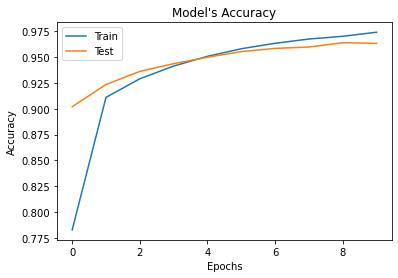

In [7]:
plt.plot(fitting_history.history["accuracy"])
plt.plot(fitting_history.history["val_accuracy"])
plt.title("Model's Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend(["Train", "Test"])
plt.show()

## 5. Predicting Validation Data

313/313 [==============================] - 0s 768us/step


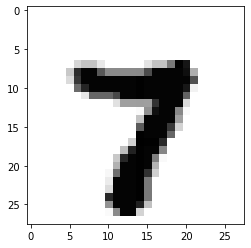

Prediction: 7


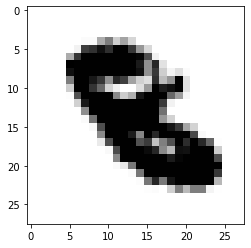

Prediction: 8


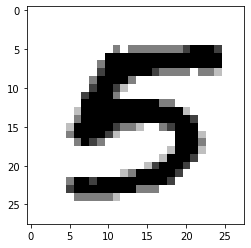

Prediction: 5


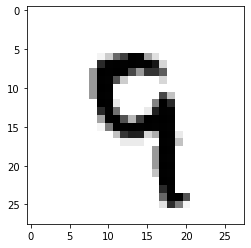

Prediction: 9


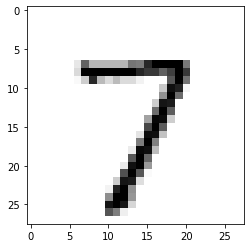

Prediction: 7


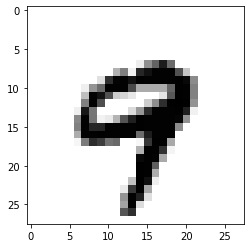

Prediction: 9


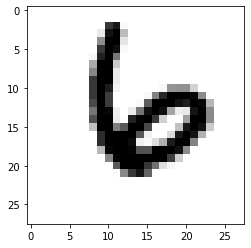

Prediction: 6


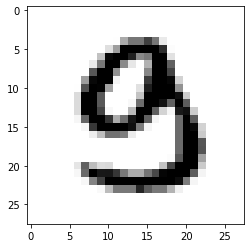

Prediction: 8


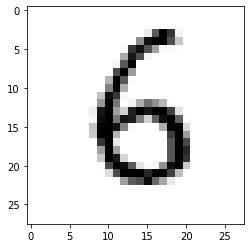

Prediction: 6


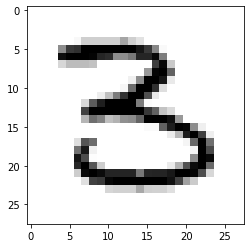

Prediction: 3


In [8]:
predictions = model.predict(x_test_norm, verbose=1)

for i in range(1100, 1110):
    
    plt.imshow(x_test[i], cmap="binary")
    plt.show()
    
    print(f"Prediction: {np.argmax(predictions[i])}")

## 6. Save the Model

In [9]:
model.save("digit_recognition_model")

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: digit_recognition_model\assets
